In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings('ignore')
sns.set()
plt.style.use('ggplot')
%matplotlib inline

In [2]:
df=pd.read_csv("liver.csv")

In [3]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [5]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [6]:
df.dtypes[df.dtypes=='object']

Gender    object
dtype: object

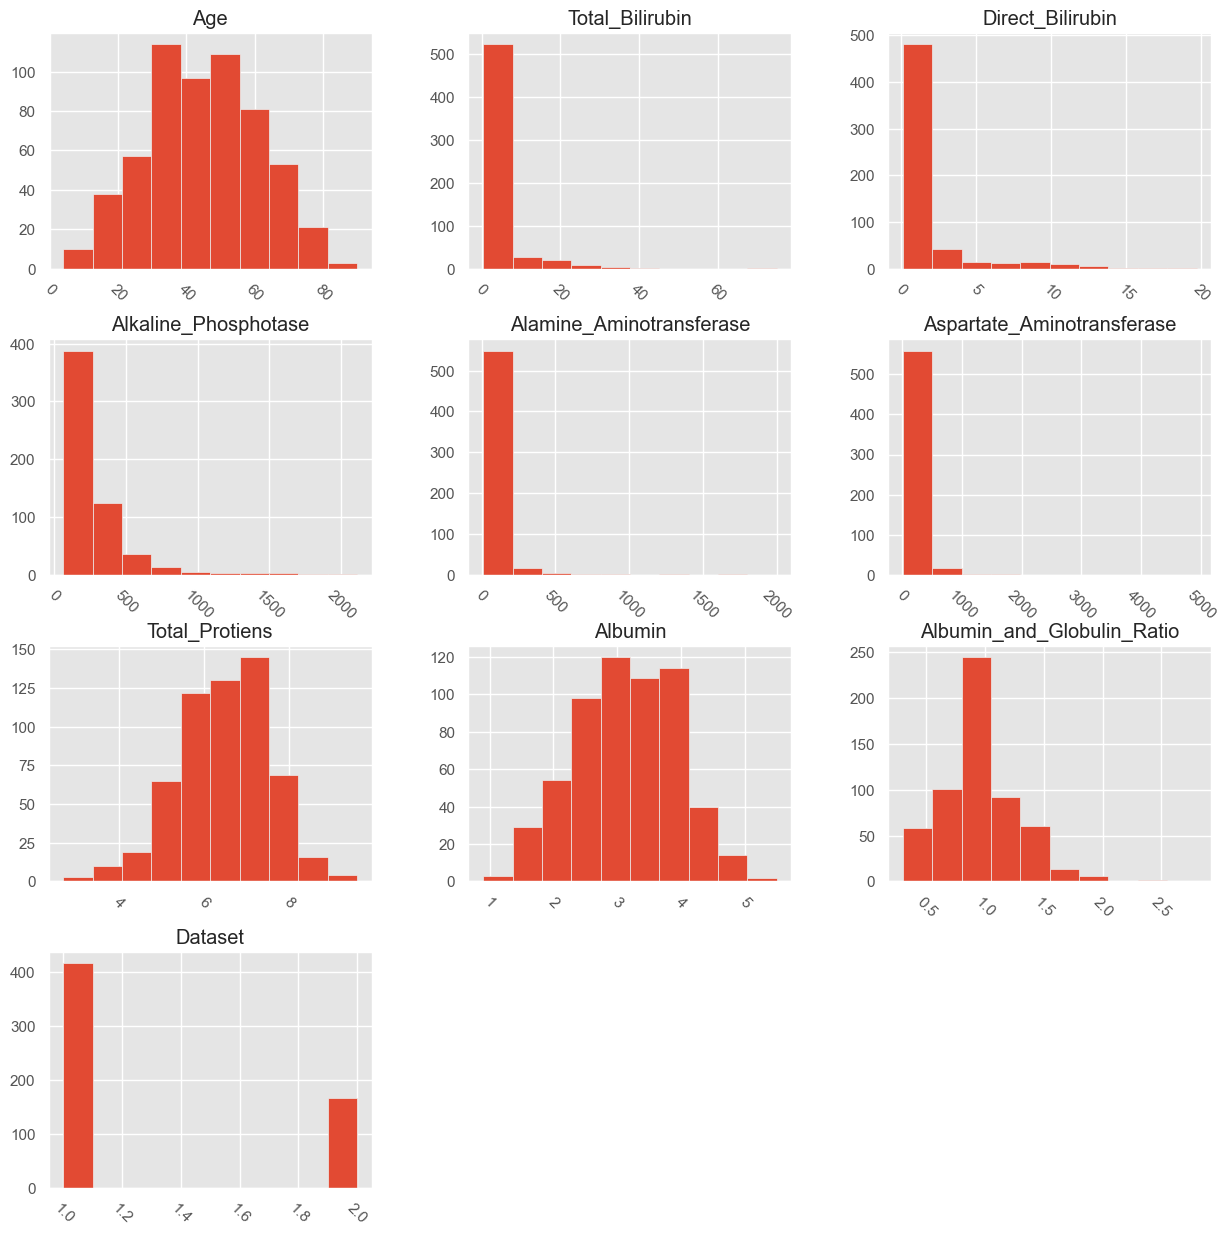

In [7]:
df.hist(figsize=(15,15), xrot=-45,bins=10)
plt.show()

In [8]:
def convertdataset(x):
    if x==2:
        return 0
    return 1
df['Dataset'] = df['Dataset'].map(convertdataset)

In [9]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [10]:
df.describe(include=['object'])

,Gender
count,583
unique,2
top,Male
freq,441


<Axes: xlabel='count', ylabel='Gender'>

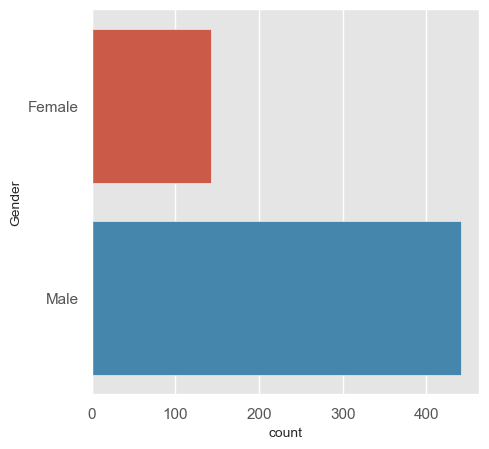

In [11]:
plt.figure(figsize=(5,5))
sns.countplot(y='Gender', data=df)

In [12]:
# Categorical Value Handling
def convertgender(x):
    if x== 'Male':
        return 0
    else:
        return 1
df['Gender'] = df['Gender'].map(convertgender)


In [13]:
df.corr()


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,-0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,0.137351
Gender,-0.056560,1.000000,-0.089291,-0.100436,0.027496,-0.082332,-0.080336,0.089121,0.093799,0.003424,-0.082416
Total_Bilirubin,0.011763,-0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,0.220208
Direct_Bilirubin,0.007529,-0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,0.246046
Alkaline_Phosphotase,0.080425,0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,0.184866
Alamine_Aminotransferase,-0.086883,-0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,0.163416
Aspartate_Aminotransferase,-0.019910,-0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,0.151934
Total_Protiens,-0.187461,0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,-0.035008
Albumin,-0.265924,0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,-0.161388
Albumin_and_Globulin_Ratio,-0.216408,0.003424,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,-0.163131


<Axes: >

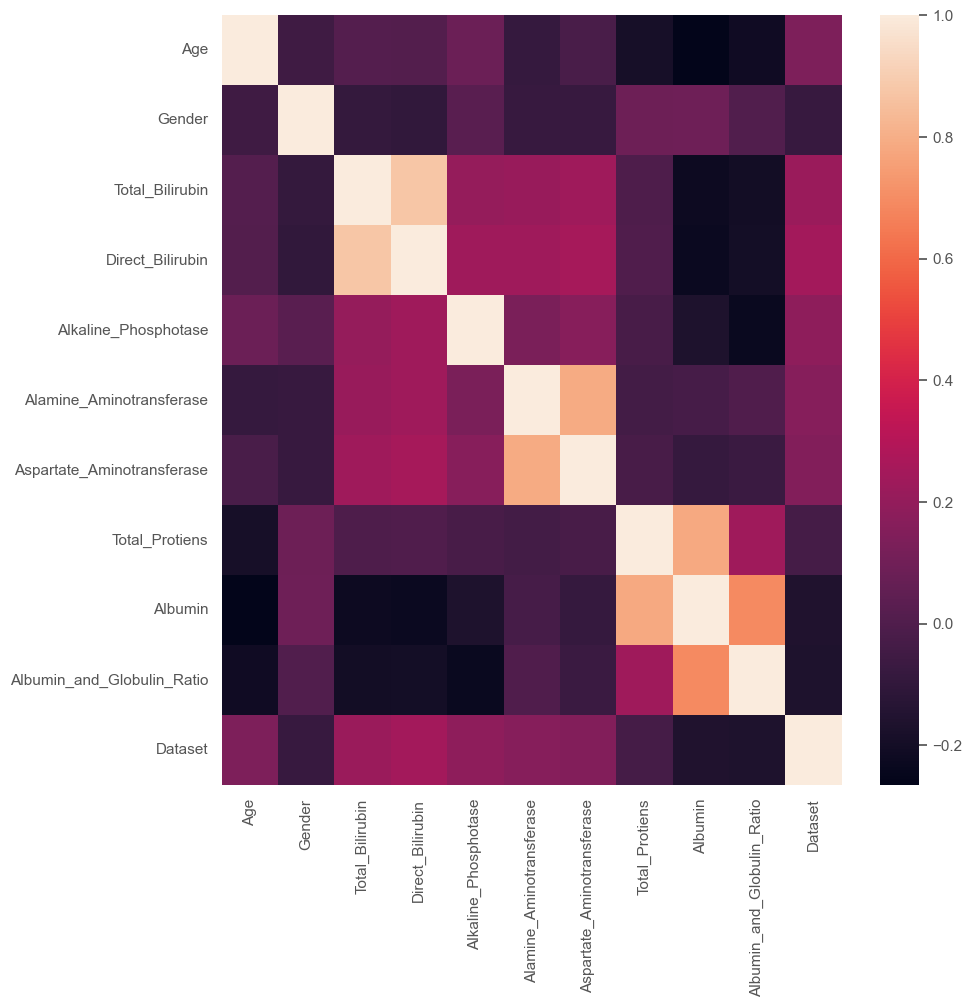

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

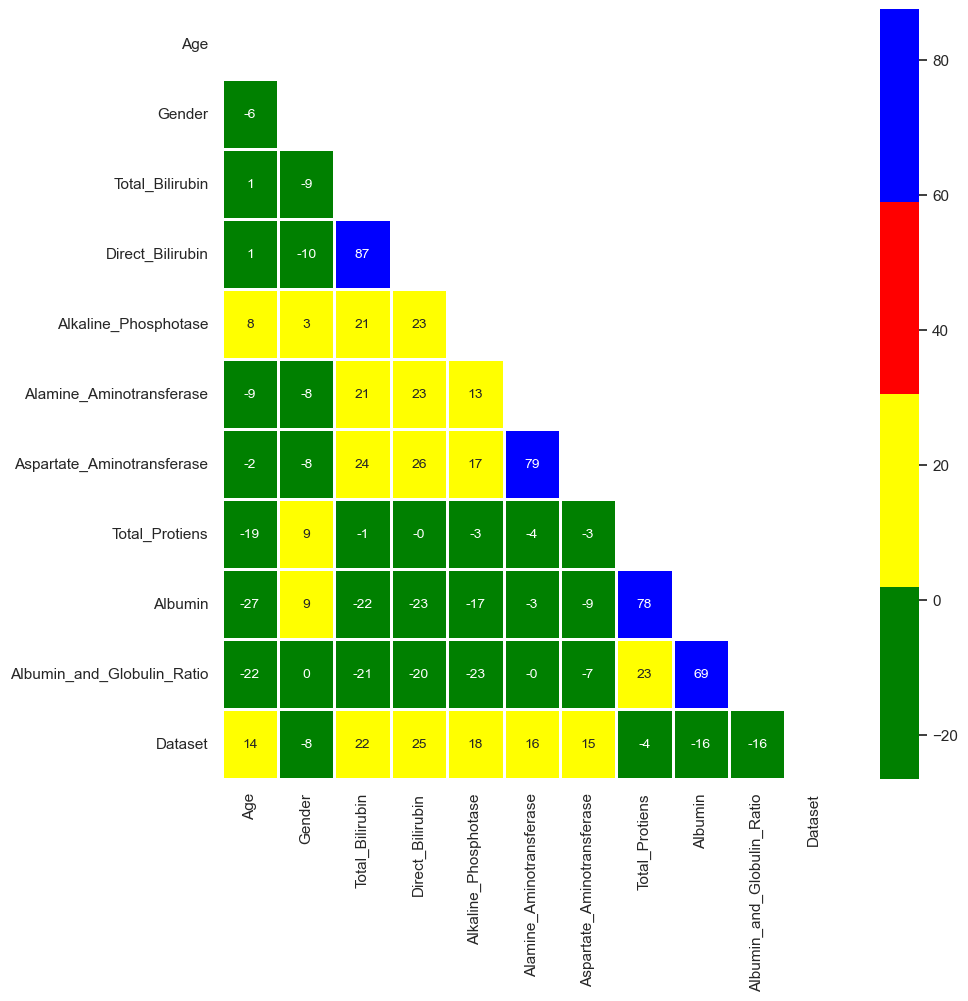

In [15]:
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
with sns.axes_style("white"):
    ax = sns.heatmap(df.corr()*100, mask=mask, fmt = ".0f", annot=True, lw=1, cmap=ListedColormap(['green','yellow','red','blue']))


In [16]:
df = df.drop_duplicates()


In [17]:
df.shape

(570, 11)

In [18]:
# Removing Outlier

<Axes: >

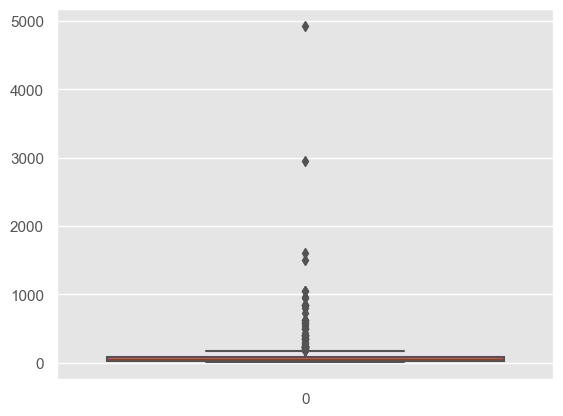

In [19]:
sns.boxplot(df.Aspartate_Aminotransferase)


<Axes: >

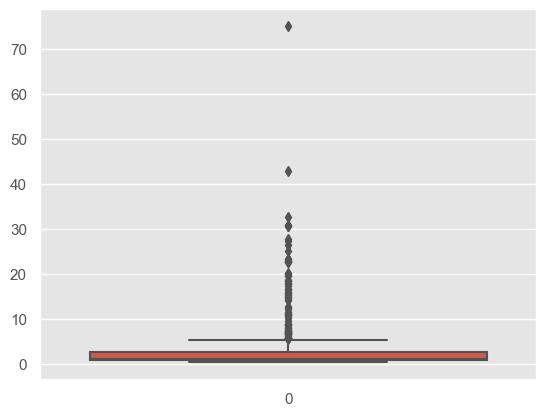

In [20]:
sns.boxplot(df.Total_Bilirubin)


In [21]:
df.Aspartate_Aminotransferase.sort_values(ascending=False).head()


135    4929
117    2946
118    1600
207    1500
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [22]:
df = df[df.Aspartate_Aminotransferase<=3000]


In [23]:
df.Aspartate_Aminotransferase.sort_values(ascending=False).head()


117    2946
118    1600
207    1500
119    1050
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [24]:
df = df[df.Aspartate_Aminotransferase<=2500]

In [25]:
df.isnull().sum()


Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [26]:
df = df.dropna(how='any')


In [27]:
df.shape

(564, 11)

In [28]:
y=df.Dataset
X=df.drop('Dataset', axis=1)

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [30]:
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=0, stratify=y)


In [31]:
train_mean = X_train.mean()
train_std = X_train.std()

In [32]:
X_train = (X_train - train_mean) / train_std


In [33]:
X_test = (X_test - train_mean) / train_std


In [34]:
def fit_and_score_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    print(f"Training Accuracy of the model is {accuracy_score(y_train, model.predict(X_train))}")
    print(f"Testing Accuracy of the model is {accuracy_score(y_test, model.predict(X_test))}")

    print(f"Confusion Matrix of the model is \n {confusion_matrix(y_test, model.predict(X_test))}\n")
    print(f"Classification Report of the model is \n{classification_report(y_test, model.predict(X_test))}")
    return score

In [35]:
lr = LogisticRegression()

In [36]:
lr_acc = fit_and_score_model(lr)

Training Accuracy of the model is 0.7117516629711752
Testing Accuracy of the model is 0.7699115044247787
Confusion Matrix of the model is 
 [[11 21]
 [ 5 76]]

Classification Report of the model is 
              precision    recall  f1-score   support

           0       0.69      0.34      0.46        32
           1       0.78      0.94      0.85        81

    accuracy                           0.77       113
   macro avg       0.74      0.64      0.66       113
weighted avg       0.76      0.77      0.74       113



In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [38]:
knn_acc = fit_and_score_model(knn)

Training Accuracy of the model is 0.811529933481153
Testing Accuracy of the model is 0.6637168141592921
Confusion Matrix of the model is 
 [[16 16]
 [22 59]]

Classification Report of the model is 
              precision    recall  f1-score   support

           0       0.42      0.50      0.46        32
           1       0.79      0.73      0.76        81

    accuracy                           0.66       113
   macro avg       0.60      0.61      0.61       113
weighted avg       0.68      0.66      0.67       113



In [39]:
svc= SVC(probability=True)
parameters = {
    'gamma':[0.0001, 0.001, 0.01, 0.1],
    'C':[0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20, 30]
}
grid_search = GridSearchCV(svc, parameters)

In [40]:
svc_acc = fit_and_score_model(grid_search)

Training Accuracy of the model is 0.7117516629711752
Testing Accuracy of the model is 0.7168141592920354
Confusion Matrix of the model is 
 [[ 0 32]
 [ 0 81]]

Classification Report of the model is 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.72      1.00      0.84        81

    accuracy                           0.72       113
   macro avg       0.36      0.50      0.42       113
weighted avg       0.51      0.72      0.60       113



In [41]:
dtc = DecisionTreeClassifier()

In [42]:
dtc_acc = fit_and_score_model(dtc)

Training Accuracy of the model is 1.0
Testing Accuracy of the model is 0.672566371681416
Confusion Matrix of the model is 
 [[17 15]
 [22 59]]

Classification Report of the model is 
              precision    recall  f1-score   support

           0       0.44      0.53      0.48        32
           1       0.80      0.73      0.76        81

    accuracy                           0.67       113
   macro avg       0.62      0.63      0.62       113
weighted avg       0.69      0.67      0.68       113



In [43]:
grid_parameter = {
    'criterion':['gini','entropy'],
    'max_depth':[3,5,7,10,12,15],
    'splitter':['best','random'],
    'min_samples_leaf':[1,2,3,5,7],
    'min_samples_split':[1,2,3,5,7],
    'max_features':['sqrt','log2']
}
grid_seach_dt = GridSearchCV(dtc, grid_parameter, cv=24, n_jobs=-1, verbose=1)

In [44]:
fit_and_score_model(grid_seach_dt)

Fitting 24 folds for each of 1200 candidates, totalling 28800 fits
Training Accuracy of the model is 0.7184035476718403
Testing Accuracy of the model is 0.6902654867256637
Confusion Matrix of the model is 
 [[21 11]
 [24 57]]

Classification Report of the model is 
              precision    recall  f1-score   support

           0       0.47      0.66      0.55        32
           1       0.84      0.70      0.77        81

    accuracy                           0.69       113
   macro avg       0.65      0.68      0.66       113
weighted avg       0.73      0.69      0.70       113



0.6902654867256637

In [45]:
grid_seach_dt.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'log2',
 'min_samples_leaf': 7,
 'min_samples_split': 7,
 'splitter': 'best'}

In [46]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='sqrt', min_samples_leaf=7, min_samples_split=3, splitter='best')


In [47]:
dtc_acc=fit_and_score_model(dtc)

Training Accuracy of the model is 0.7184035476718403
Testing Accuracy of the model is 0.6902654867256637
Confusion Matrix of the model is 
 [[21 11]
 [24 57]]

Classification Report of the model is 
              precision    recall  f1-score   support

           0       0.47      0.66      0.55        32
           1       0.84      0.70      0.77        81

    accuracy                           0.69       113
   macro avg       0.65      0.68      0.66       113
weighted avg       0.73      0.69      0.70       113



In [48]:
rand_clf = RandomForestClassifier(criterion='entropy', max_depth=15, max_features=0.75, min_samples_leaf=7, min_samples_split=3, n_estimators = 130)


In [49]:
rand_clf_acc = fit_and_score_model(rand_clf)

Training Accuracy of the model is 0.9024390243902439
Testing Accuracy of the model is 0.6902654867256637
Confusion Matrix of the model is 
 [[10 22]
 [13 68]]

Classification Report of the model is 
              precision    recall  f1-score   support

           0       0.43      0.31      0.36        32
           1       0.76      0.84      0.80        81

    accuracy                           0.69       113
   macro avg       0.60      0.58      0.58       113
weighted avg       0.66      0.69      0.67       113



In [50]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

parameters = {
    'loss': ['log_loss', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

grid_search_gbc = GridSearchCV(gbc, parameters, cv = 20, n_jobs = -1, verbose = 1)

In [51]:
gbc_acc = fit_and_score_model(grid_search_gbc)

Fitting 20 folds for each of 32 candidates, totalling 640 fits
Training Accuracy of the model is 0.7117516629711752
Testing Accuracy of the model is 0.7168141592920354
Confusion Matrix of the model is 
 [[ 0 32]
 [ 0 81]]

Classification Report of the model is 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.72      1.00      0.84        81

    accuracy                           0.72       113
   macro avg       0.36      0.50      0.42       113
weighted avg       0.51      0.72      0.60       113



In [52]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective='binary:logistic', learning_rate = 0.001, max_depth = 100, n_estimators = 300)

In [53]:
xgb_acc = fit_and_score_model(xgb)

Training Accuracy of the model is 0.7117516629711752
Testing Accuracy of the model is 0.7168141592920354
Confusion Matrix of the model is 
 [[ 0 32]
 [ 0 81]]

Classification Report of the model is 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.72      1.00      0.84        81

    accuracy                           0.72       113
   macro avg       0.36      0.50      0.42       113
weighted avg       0.51      0.72      0.60       113



In [54]:
models = pd.DataFrame({
    'Model':['Logistic Regreesion','KNN', 'SVC', 'Decision Tree Classifier', 'Random Forest Classifier', 'Gradient Boosting Classifer', 'XgBoost'],
    'Score':[100*round(lr_acc, 4), 100*round(knn_acc, 4), 100*round(svc_acc, 4), 100*round(dtc_acc, 4), 100*round(rand_clf_acc, 4), 100*round(gbc_acc, 4),100*round(xgb_acc, 4)]
})

In [55]:
models.sort_values(by='Score', ascending=False)


,Model,Score
0,Logistic Regreesion,76.99
2,SVC,71.68
5,Gradient Boosting Classifer,71.68
6,XgBoost,71.68
3,Decision Tree Classifier,69.03
4,Random Forest Classifier,69.03
1,KNN,66.37


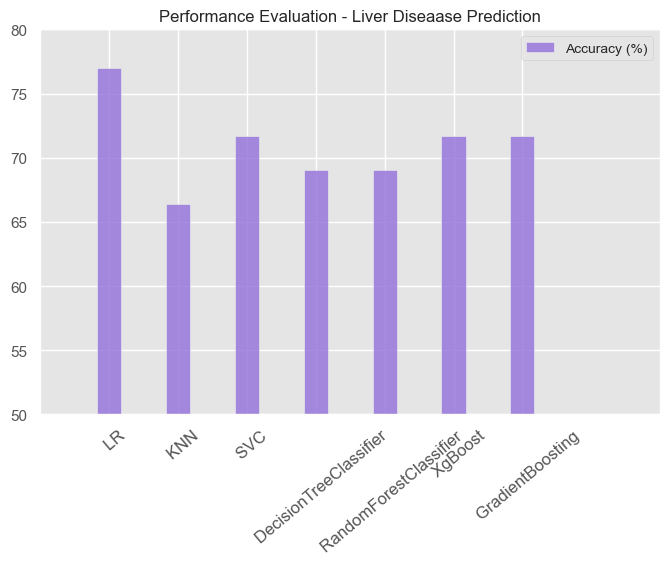

In [56]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

means_roc = []
means_accuracy = [100*round(lr_acc,4), 100*round(knn_acc,4), 100*round(svc_acc,4), 100*round(dtc_acc,4), 
                  100*round(rand_clf_acc,4),100*round(xgb_acc,4),100*round(gbc_acc,4) ]

# data to plot
n_groups = 7
means_accuracy = tuple(means_accuracy)
means_roc = tuple(means_roc)

# create plot
fig, ax = plt.subplots(figsize=(8,5))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

plt.bar(index, means_accuracy, bar_width,
alpha=opacity,
color='mediumpurple',
label='Accuracy (%)')

plt.xlim([-1, 8])
plt.ylim([50, 80])

plt.title('Performance Evaluation - Liver Diseaase Prediction', fontsize=12)
plt.xticks(index, ('   LR', '   KNN','   SVC', '   DecisionTreeClassifier', '    RandomForestClassifier','   XgBoost','   GradientBoosting'), rotation=40, ha='center', fontsize=12)
plt.legend(loc="upper right", fontsize=10)
plt.savefig("PE_Liver_disease.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

In [60]:
import pickle
model = lr
pickle.dump(model, open("liver.pkl",'wb'))